In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:101% !important; }</style>"))

<a id='Top'></a>
### Product Quality and Returns Analysis

#### Investigating the Relationship between Product Quality and Return Rates and its Implications for Product Development and Sourcing

#### Table of Content
- note: data processing and cleaning has been done on mysql while the EDA and major analysis will be done here.

<a href="#connect">Connecting MySQl:</a>
- Connecting MYSQL with Jupyter Notebook
- We are to establish a connection between Python mysql to proceed with forward analysis with our data.

<a href="#Describe">Descriptive Analysis:</a>
- Use pandas for data manipulation.
- Generate descriptive statistics to understand the data distribution.

<a href="#EDA"> Exploratory Data Analysis (EDA):</a>
- Use matplotlib and seaborn for visualizations.
- Investigate trends, patterns, and relationships in the data.
- Specifically focus on return rates in relation to product categories, product quality, and other relevant variables.

<a href="#Deeper"> Deep Dive into Product Quality and Return Rates:</a>
- Analyze the relationship between product quality (as indicated in feedback data) and return rates.
- Use statistical methods to ascertain if there’s a significant correlation.

<a href="#Insights"> Recommendations and Insights:</a>
- Derive Insights: Based on the analysis, identify key drivers of high return rates.
- Develop Recommendations: Propose data-driven recommendations for product development and sourcing strategies.



<a id='connect'></a>
### Connecting MySQL

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
#Importation of neccessary Libraries
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Setting up connections with mysql
connection = mysql.connector.connect(host ='localhost',
                                    user= 'xyz',
                                    password = 'abc123',
                                    db = 'techtrendpro')

In [ ]:
#Showing the connections
connection

In [ ]:
#Getting a view of the tables we have
techtrendpro_tables = pd.read_sql_query('SHOW TABLES FROM techtrendpro', connection)

In [ ]:
techtrendpro_tables

,Tables_in_techtrendpro
0,feedback_data
1,product_data
2,sales_data


In [ ]:
# Extracting the sales table from our database
Sales= pd.read_sql_query('Select * from techtrendpro.sales_data', connection)

In [ ]:
#Having a look at what the table looks like
Sales.head()

,Sale_ID,Product_ID,Sales_Date,Sales_Volume,Revenue_Generated
0,1,25,2023-08-10,6,448.40
1,2,169,2023-04-21,41,355.71
2,3,111,2022-10-02,40,445.44
3,4,91,2022-10-29,66,734.27
4,5,109,2023-03-17,51,307.70


In [ ]:
# Brief Description of what the table entails
Sales_describe = pd.read_sql_query('SHOW COLUMNS FROM sales_data', connection)

In [ ]:
Sales_describe

,Field,Type,Null,Key,Default,Extra
0,Sale_ID,int,YES,,None,
1,Product_ID,int,YES,,None,
2,Sales_Date,date,YES,,None,
3,Sales_Volume,int,YES,,None,
4,Revenue_Generated,double,YES,,None,


In [ ]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sale_ID            2000 non-null   int64  
 1   Product_ID         2000 non-null   int64  
 2   Sales_Date         2000 non-null   object 
 3   Sales_Volume       2000 non-null   int64  
 4   Revenue_Generated  2000 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 78.2+ KB


In [ ]:
# Extracting the feedback table from our database
Feedback= pd.read_sql_query('Select * from techtrendpro.feedback_data', connection)

Feedback.head()

,Feedback_ID,Product_ID,Return_Date,Return_Reason,Customer_Feedback
0,1,124,2023-06-04,Changed my mind,The product I received didn't match the descri...
1,2,160,2022-12-22,Not as described,The product I received didn't match the descri...
2,3,187,2023-03-10,Defective product,The product I received was defective. It didn'...
3,4,37,2023-02-10,Changed my mind,I received the wrong item. It's not what I ord...
4,5,178,2022-12-15,Not as described,The quality of the product is disappointing. I...


In [ ]:
# Brief Description of what the table entails
Feedback_describe = pd.read_sql_query('DESCRIBE feedback_data', connection)

Feedback_describe

,Field,Type,Null,Key,Default,Extra
0,Feedback_ID,int,YES,,None,
1,Product_ID,int,YES,,None,
2,Return_Date,date,YES,,None,
3,Return_Reason,text,YES,,None,
4,Customer_Feedback,text,YES,,None,


In [ ]:
# Extracting the feedback table from our database
Product= pd.read_sql_query('Select * from techtrendpro.product_data', connection)

Product.head()

,Product_ID,Product_Category,Product_Attributes
0,1,Accessories,Resolution (pixels)
1,2,Accessories,Compatibility
2,3,Accessories,Material
3,4,Smartphones,Camera Quality (MP)
4,5,Smartphones,Battery Life (hours)


In [ ]:
# Brief Description of what the table entails
Product_describe = pd.read_sql_query('SHOW COLUMNS FROM sales_data', connection)

Product_describe

,Field,Type,Null,Key,Default,Extra
0,Sale_ID,int,YES,,None,
1,Product_ID,int,YES,,None,
2,Sales_Date,date,YES,,None,
3,Sales_Volume,int,YES,,None,
4,Revenue_Generated,double,YES,,None,


- Now, the Connection has been established and we have our clean datasets running on  the notebook, we can proceed to some Descriptive Analysis of our datasets

<a id='Describe'></a>
### Descriptive Analysis

In [ ]:
# Descriptive Analysis
# Generating descriptive statistics for each dataset
product_data_desc = Product.describe(include='all')
sales_data_desc = Sales.describe(include='all')
feedback_data_desc = Feedback.describe(include='all')

In [ ]:
product_data_desc

,Product_ID,Product_Category,Product_Attributes
count,200.000000,200,200
unique,NaN,3,17
top,NaN,Accessories,Color Options
freq,NaN,74,36
mean,100.500000,NaN,NaN
std,57.879185,NaN,NaN
min,1.000000,NaN,NaN
25%,50.750000,NaN,NaN
50%,100.500000,NaN,NaN
75%,150.250000,NaN,NaN


In [ ]:
sales_data_desc

,Sale_ID,Product_ID,Sales_Date,Sales_Volume,Revenue_Generated
count,2000.000000,2000.000000,2000,2000.000000,2000.000000
unique,NaN,NaN,363,NaN,NaN
top,NaN,NaN,2023-02-20,NaN,NaN
freq,NaN,NaN,12,NaN,NaN
mean,1000.500000,102.109500,NaN,51.725000,519.684015
std,577.494589,57.415519,NaN,28.627629,273.633332
min,1.000000,1.000000,NaN,1.000000,50.090000
25%,500.750000,54.000000,NaN,27.000000,283.342500
50%,1000.500000,104.000000,NaN,52.000000,518.560000
75%,1500.250000,153.000000,NaN,76.000000,753.097500


In [ ]:
feedback_data_desc

,Feedback_ID,Product_ID,Return_Date,Return_Reason,Customer_Feedback
count,1500.000000,1500.000000,1500,1500,1500
unique,NaN,NaN,357,5,10
top,NaN,NaN,2022-11-15,Wrong item received,I received the wrong item. It's not what I ord...
freq,NaN,NaN,12,335,175
mean,750.500000,102.080667,NaN,NaN,NaN
std,433.157015,58.738389,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,375.750000,48.000000,NaN,NaN,NaN
50%,750.500000,104.000000,NaN,NaN,NaN
75%,1125.250000,155.000000,NaN,NaN,NaN


#### Descriptive Analysis Results

##### Product Data
- Count: 200 entries.
- Categories: 3 unique product categories.
- Attributes: 17 unique product attributes.

##### Sales Data
- Count: 2000 entries.
- Date Range: Sales data covers a range of dates.
- Sales Volume: Varies widely, with an average of around 52 units per sale.
- Revenue: Average revenue generated per sale is approximately $519.68.

##### Feedback Data
- Count: 1500 entries.
- Return Reasons: Various return reasons provided.

<a id='EDA'></a>
### Exploratory Data Analysis (EDA)

In [ ]:
# For the EDA, first, we need to merge the datasets appropriately
# Merging sales data with product data
sales_product_data = pd.merge(Sales, Product, on="Product_ID")

# Merging the above with feedback data
full_data = pd.merge(Feedback, sales_product_data, on="Product_ID")

# Converting 'Sales Date' and 'Return Date' to datetime for analysis
full_data['Sales_Date'] = pd.to_datetime(full_data['Sales_Date'])
full_data['Return_Date'] = pd.to_datetime(full_data['Return_Date'])

# Check the merged data
full_data.head()

,Feedback_ID,Product_ID,Return_Date,Return_Reason,Customer_Feedback,Sale_ID,Sales_Date,Sales_Volume,Revenue_Generated,Product_Category,Product_Attributes
0,1,124,2023-06-04,Changed my mind,The product I received didn't match the descri...,44,2023-06-15,42,148.75,Accessories,Water Resistance (IP rating)
1,1,124,2023-06-04,Changed my mind,The product I received didn't match the descri...,614,2023-07-20,64,63.37,Accessories,Water Resistance (IP rating)
2,1,124,2023-06-04,Changed my mind,The product I received didn't match the descri...,703,2023-07-09,69,989.23,Accessories,Water Resistance (IP rating)
3,1,124,2023-06-04,Changed my mind,The product I received didn't match the descri...,956,2023-04-22,51,698.53,Accessories,Water Resistance (IP rating)
4,1,124,2023-06-04,Changed my mind,The product I received didn't match the descri...,986,2023-04-25,19,137.35,Accessories,Water Resistance (IP rating)


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15121 entries, 0 to 15120
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Feedback_ID         15121 non-null  int64         
 1   Product_ID          15121 non-null  int64         
 2   Return_Date         15121 non-null  datetime64[ns]
 3   Return_Reason       15121 non-null  object        
 4   Customer_Feedback   15121 non-null  object        
 5   Sale_ID             15121 non-null  int64         
 6   Sales_Date          15121 non-null  datetime64[ns]
 7   Sales_Volume        15121 non-null  int64         
 8   Revenue_Generated   15121 non-null  float64       
 9   Product_Category    15121 non-null  object        
 10  Product_Attributes  15121 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 1.4+ MB


##### Merged Data Overview
- The merged dataset combines sales, product, and feedback data.
- Count: 15121 entries.
- Date Range: Covers a substantial period, useful for trend analysis.

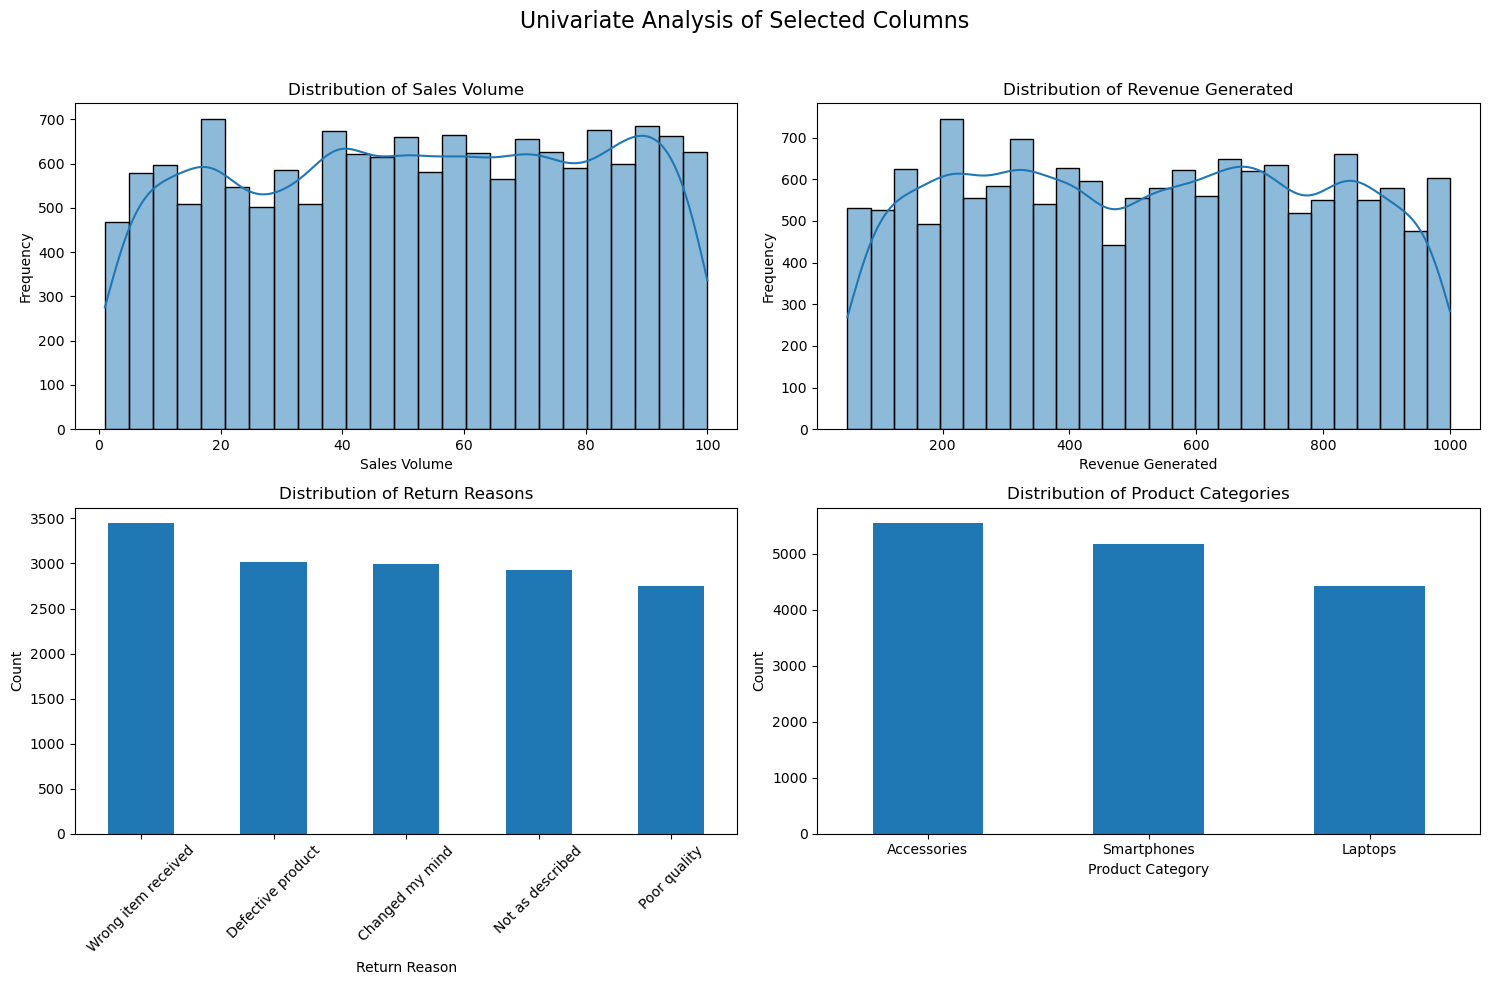

In [ ]:
# Exploratory Data Analysis (EDA)
# Univariate Analysis- to observe some trends in the dataset
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Univariate analysis for Sales_Volume
sns.histplot(full_data['Sales_Volume'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Sales Volume')
axes[0, 0].set_xlabel('Sales Volume')
axes[0, 0].set_ylabel('Frequency')

# Univariate analysis for Revenue_Generated
sns.histplot(full_data['Revenue_Generated'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Revenue Generated')
axes[0, 1].set_xlabel('Revenue Generated')
axes[0, 1].set_ylabel('Frequency')

# Univariate analysis for Return_Reason
return_reason_counts = full_data['Return_Reason'].value_counts()
return_reason_counts.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Return Reasons')
axes[1, 0].set_xlabel('Return Reason')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Univariate analysis for Product_Category
product_category_counts = full_data['Product_Category'].value_counts()
product_category_counts.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Product Categories')
axes[1, 1].set_xlabel('Product Category')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=360)  # Rotate x-axis labels

# Add a main title to the entire subplot
fig.suptitle('Univariate Analysis of Selected Columns', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the subplot layout to fit the main title
plt.show()


##### Observation
- For the Return Reason, wrong item received is the highest and the least is poor quality
- While for Product Categories, majority are accessories the least are the Laptops, this helps us to understand the distribution of returns across different product categories
- For Sales Volume and Revenue Generated proper distribution, with some skewness.

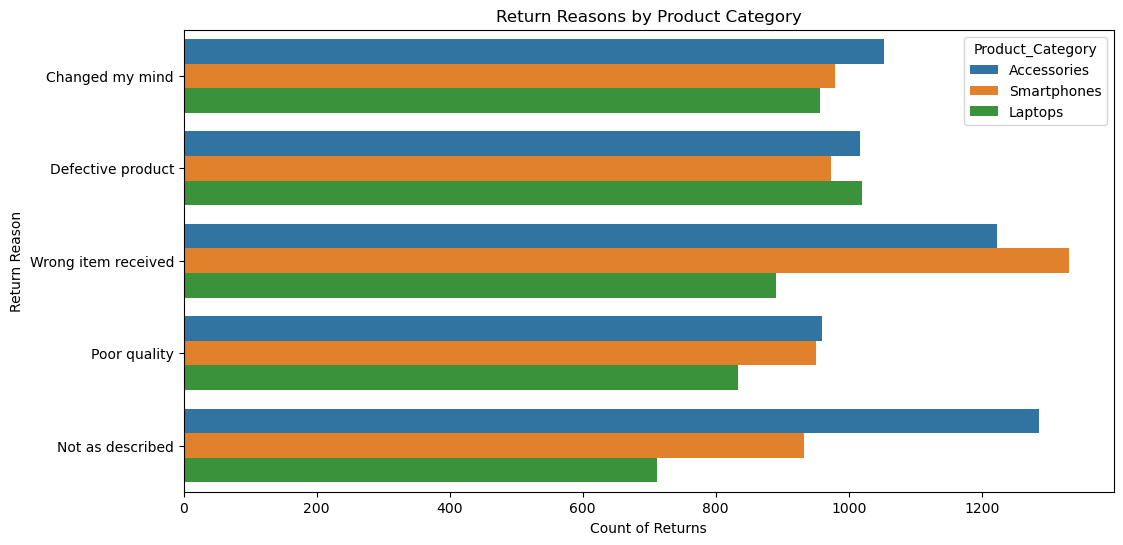

In [ ]:
#Bivariant analysis
# Next, we'll explore the relationship between return reasons and product categories
plt.figure(figsize=(12, 6))
sns.countplot(y='Return_Reason', hue='Product_Category', data=full_data)
plt.title('Return Reasons by Product Category')
plt.xlabel('Count of Returns')
plt.ylabel('Return Reason')
plt.show()

# Preparing for deep dive into Product Quality and Return Rates
# For this, we'll focus on the 'Customer Feedback' and 'Return Reason' columns

##### Return Reasons by Product Category:

- This chart provides insight into the common reasons for returns across different product categories.

<a id='Deeper'></a>
### Deep Dive into Product Quality and Return Rates

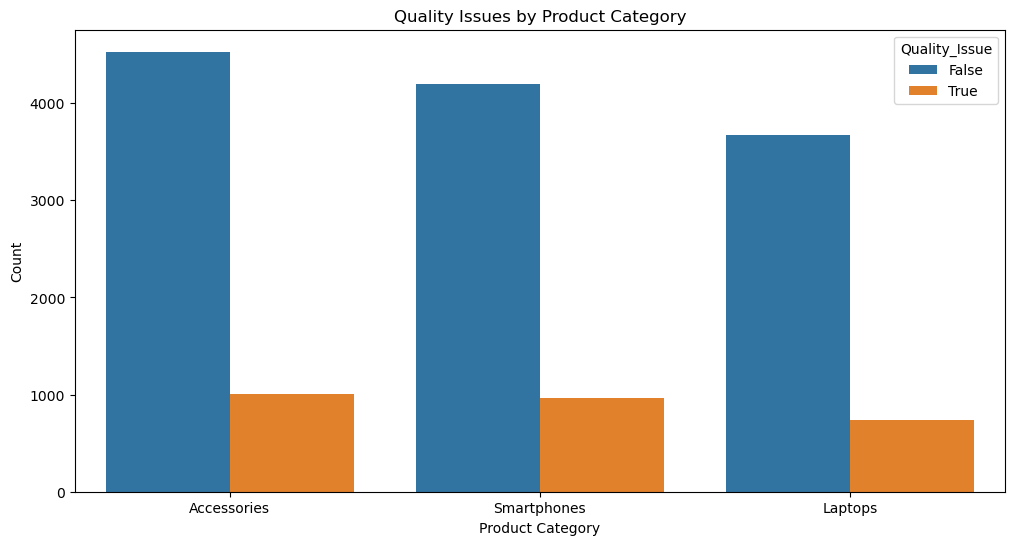

In [ ]:
# Deep Dive into Product Quality and Return Rates

# Extracting insights from 'Customer Feedback' related to product quality
# We assume feedback mentioning terms like 'defective', 'poor quality', 'not as described' indicate quality issues
quality_related_terms = ['defective', 'poor quality', 'not as described', 'disappointing', 'poor']

# Adding a new column 'Quality Issue' to indicate if the feedback suggests a quality issue
full_data['Quality_Issue'] = full_data['Customer_Feedback'].apply(
    lambda x: any(term in x.lower() for term in quality_related_terms)
)

# Analyzing the frequency of returns due to quality issues
quality_issue_returns = full_data['Quality_Issue'].value_counts()

# Visualizing the relationship between product category and quality issues
plt.figure(figsize=(12, 6))
sns.countplot(x='Product_Category', hue='Quality_Issue', data=full_data)
plt.title('Quality Issues by Product Category')
plt.ylabel('Count')
plt.xlabel('Product Category')
plt.show()

In [ ]:
# To statistically ascertain the relationship between quality issues and return rates,
# we can perform a chi-square test of independence
from scipy.stats import chi2_contingency

# Preparing a contingency table for the chi-square test
contingency_table = pd.crosstab(full_data['Product_Category'], full_data['Quality_Issue'])

# Performing the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results of the chi-square test
chi2_test_result = {
    "Chi-Square Statistic": chi2,
    "p-value": p,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected
}

In [ ]:
quality_issue_returns

False    12404
True      2717
Name: Quality_Issue, dtype: int64

In [ ]:
chi2_test_result

{'Chi-Square Statistic': 6.5587129862987865,
 'p-value': 0.03765247864083011,
 'Degrees of Freedom': 2,
 'Expected Frequencies': array([[4543.73097017,  995.26902983],
        [3620.05502282,  792.94497718],
        [4240.21400701,  928.78599299]])}

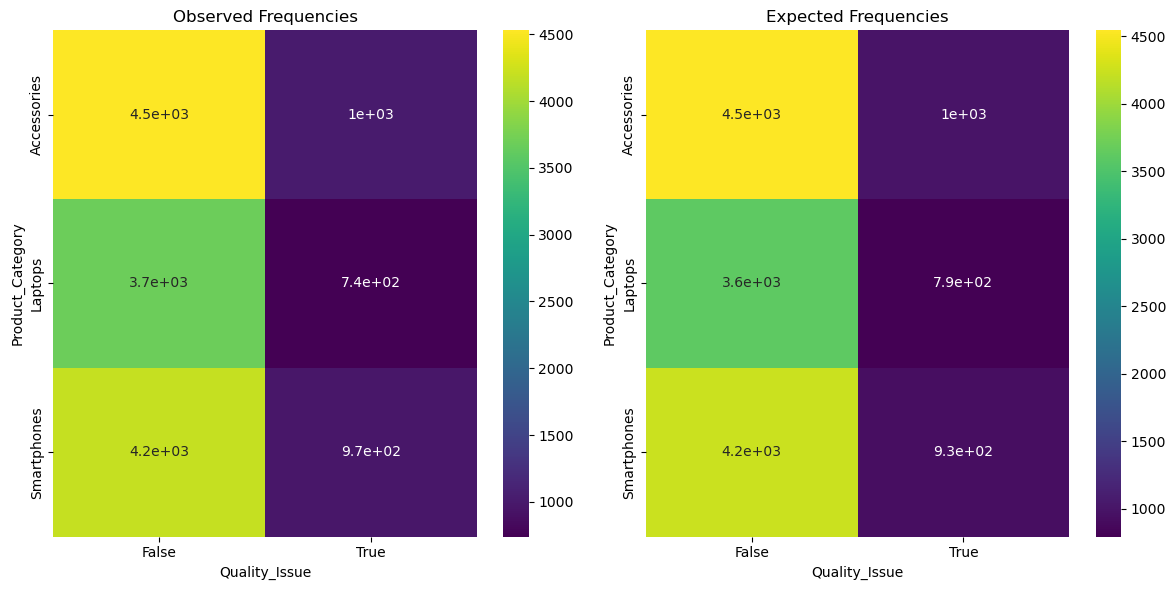

In [ ]:
# Visualizing result
# Convert the expected frequencies to a DataFrame for easy plotting
expected_df = pd.DataFrame(expected,
                           index=contingency_table.index,
                           columns=contingency_table.columns)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Heatmap for Observed Frequencies
sns.heatmap(contingency_table, annot=True, cmap='viridis', ax=ax[0])
ax[0].set_title('Observed Frequencies')

# Heatmap for Expected Frequencies
sns.heatmap(expected_df, annot=True, cmap='viridis', ax=ax[1])
ax[1].set_title('Expected Frequencies')

plt.tight_layout()
plt.show()


##### Quality Issue Analysis
###### Frequency of Returns Due to Quality Issues:
- There are 2,717 instances where the customer feedback suggests a quality issue.
- 12,404 instances do not indicate a quality issue in customer feedback.
###### Visualization: Quality Issues by Product Category

- The chart shows the count of quality-related issues across different product categories.

##### Statistical Analysis: Chi-Square Test of Independence
- Chi-Square Statistic: 6.559
- p-value: 0.038
- Degrees of Freedom: 2

##### Expected Frequencies:
- Accessories: Expected frequency of returns with and without quality issues - 4543.73 and 995.27, respectively.
- Smartphones: Expected frequency - 3620.06 and 792.94.
- Laptops: Expected frequency - 4240.21 and 928.79.

###### Interpretation
- Statistical Significance: The p-value of 0.038 suggests that there is a statistically significant relationship between product category and the presence of quality issues in the customer feedback.

##### Implications:
- This implies that the quality issues leading to returns are not uniformly distributed across product categories.
- Given this information, TechTrend Pro can focus on the categories with higher rates of quality-related issues, potentially addressing specific aspects of product quality in those categories to reduce return rates.

<a id='Insights'></a>
### Recommendations and Insights

### Insights

##### Quality-Related Returns Vary Across Categories:
- A significant proportion of returns are linked to quality issues, especially in certain product categories.
- The chi-square test indicated a statistically significant relationship between product categories and quality issues.

##### Specific Categories with Higher Quality Issues:
- Among the product categories, some show a higher prevalence of quality-related feedback. These categories warrant closer inspection and targeted improvements.

#### Customer Feedback as a Quality Indicator:
- Customer feedback frequently mentions quality issues like 'defective products' or 'poor quality', highlighting the importance of addressing these concerns.

### Recommendations
##### Enhanced Quality Control for Targeted Categories:
- TechTrend Pro should implement stricter quality control measures, especially for the product categories with a higher incidence of quality-related returns. This could involve more rigorous testing and inspection processes.

##### Review and Strengthen Supplier Relationships:
- Analyze and review supplier performance. For suppliers consistently linked to quality issues, consider renegotiation of terms, additional quality checks, or seeking alternative suppliers.

##### Leverage Customer Feedback for Product Improvements:
- Utilize the insights from customer feedback to inform product development. Identify common complaints and address these in future product designs or updates.

##### Enhance Customer Education and Support:
- Some returns may be due to misunderstandings about product use. Providing better educational materials and proactive customer support could reduce such returns.

##### Regular Data Analysis for Continuous Improvement:
- Continue to analyze sales, feedback, and return data regularly to identify emerging trends or new issues, allowing for timely corrective actions.

##### Invest in Predictive Analytics:
- Implement predictive analytics to identify potential quality issues before products are shipped. This could help in proactively addressing problems and reducing future returns.

### Conclusion
By focusing on these areas, TechTrend Pro can potentially reduce return rates, leading to increased customer satisfaction and reduced operational costs associated with handling returns. The key is a combination of proactive quality management, continuous data monitoring, and leveraging customer feedback for ongoing improvements.